# Image processing with Python II

- This is a tutorial on the basics of image analysis with Python

In [83]:
import random
random.seed(22)

groups = list(range(1, 6))
random.shuffle(groups)

for task in range(1, 6):
    if task == 3:
      print(f"Task {task} assigned to group {groups[task-1]}")

Task 3 assigned to group 1


## 1. Importing Modules & Packages

- Import the necesary packages

In [84]:
import os
import skimage.io as io
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.filters import threshold_otsu, threshold_local

## 2. Loading Image Data and vizualize

*   Load all images in the /data2 folder (not one by one, but efficiently using a loop or list comprehension).
*   Transform the GT to binary mask, if necessary
*   Visualize the images using subplots, arranging them in X rows and 2 columns (left column for noisy images and right column for the corresponding ground truth (GT) images).
*   Ensure the color bar range is the same for both columns, i.e., use the same color scale for all images.

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/content/drive/MyDrive/IntroBioImageAnalysis-main/data2/img1_GT.tif: 1 - dtype int8 - shape (128, 128)
/content/drive/MyDrive/IntroBioImageAnalysis-main/data2/img2_GT.tif: 1 - dtype int8 - shape (128, 128)
/content/drive/MyDrive/IntroBioImageAnalysis-main/data2/img3_GT.tif: 1 - dtype int8 - shape (474, 448)
/content/drive/MyDrive/IntroBioImageAnalysis-main/data2/img4_GT.tif: 1 - dtype int8 - shape (422, 390)
/content/drive/MyDrive/IntroBioImageAnalysis-main/data2/img5_GT.tif: 1 - dtype int8 - shape (458, 428)
/content/drive/MyDrive/IntroBioImageAnalysis-main/data2/img6_GT.tif: 1 - dtype int8 - shape (604, 526)
/content/drive/MyDrive/IntroBioImageAnalysis-main/data2/img7_GT.tif: 1 - dtype int8 - shape (1119, 1257)
/content/drive/MyDrive/IntroBioImageAnalysis-main/data2/img8_GT.tif: 1 - dtype int8 - shape (512, 512)
/content/drive/MyDrive/IntroBioImageAnalysis-main/data2/img9_GT.tif: 1 - dtype int8 - shape (295, 368)
/content/drive/MyDrive/IntroBioImageAnalysis-main/data2/img10_GT.tif: 1

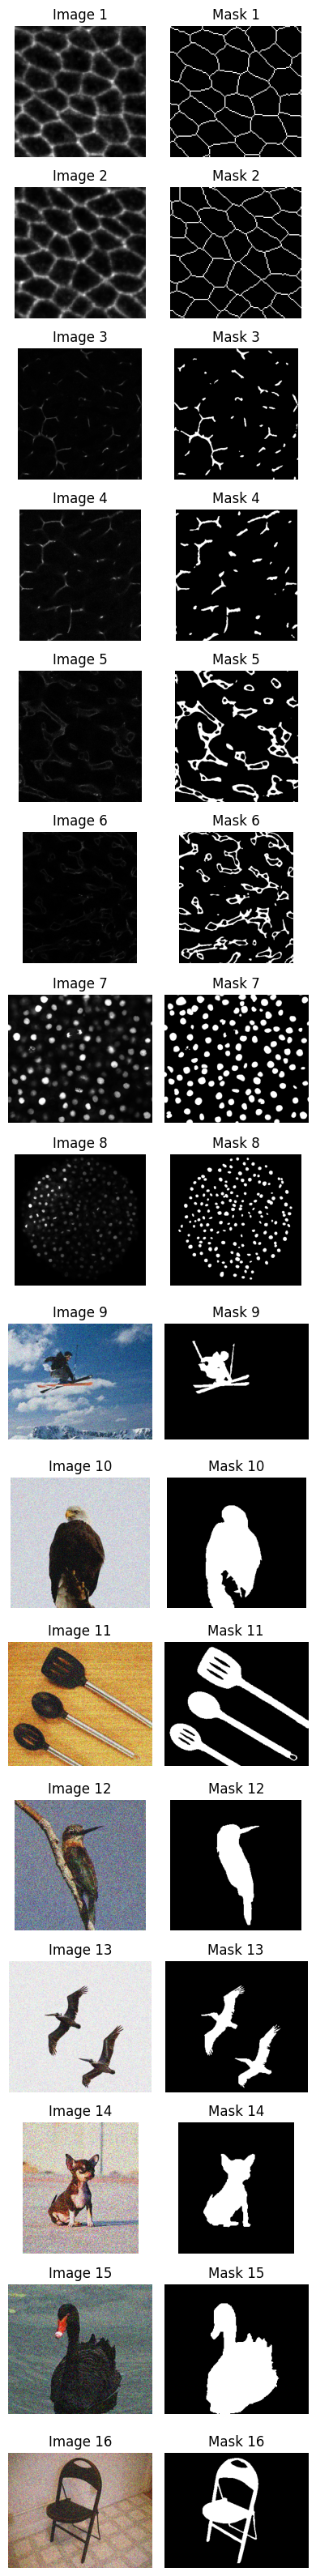

In [86]:
src_path =f'/content/drive/MyDrive/IntroBioImageAnalysis-main/data2'
N = 16

images = []
masks = []
for idx in range(1, N+1):
  name_img = f"img{idx}.tif"
  name_mask = f"img{idx}_GT.tif"
  name_img = os.path.join(src_path, name_img)
  name_mask = os.path.join(src_path, name_mask)

  img = io.imread(name_img)
  mask = io.imread(name_mask)
  if idx < 3:
    mask = (mask < 1).astype(np.int8)
  else:
    mask = mask / np.max(mask)
    mask = mask > 0.5
    mask = mask.astype(np.int8)
    #mask = mask / int(255.0)
    #mask = (mask > 0).astype(np.int8)
  print(f'{name_mask}: {np.max(mask)} - dtype {mask.dtype} - shape {mask.shape}')
  images.append(img)
  masks.append(mask)


# Plot
num_samples = len(images)
fig, axes = plt.subplots(num_samples, 2, figsize=(4, 2 * num_samples))

# Plot each image-mask pair
for i in range(num_samples):
    #print(f'{i}: {np.max(images[i])} - dtype {images[i].dtype} - shape {images[i].shape}')
    # Plot image in first column
    axes[i, 0].imshow(images[i], cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Image {}'.format(i+1))

    # Plot mask in second column
    axes[i, 1].imshow(masks[i], cmap='gray')
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Mask {}'.format(i+1))

plt.tight_layout()
plt.show()



## 3. Image filtering

*   Transform RGB images to gray scale, when necessary.
*   Install and use the high-quality denoising method BM3D (Block-Matching and 3D Filtering): https://pypi.org/project/bm3d/.
*   Use Gaussing bluring for denoising too.
*   Use widgets for the interactive selection of the parameters and select the best values for two selected images. In other words, find the parameters that blur out the noise while keeping the structures of interest.
*   Visualize the best results using subplots. For each image, display:
    - The noisy image.
    - The results of the two filtering methods.
*   Ensure the color bar range is the same for both columns, i.e., use the same color scale for all images.
*   Estimate the Blind/Referenceless Image Spatial Quality Evaluator (BRISQUE) (https://pypi.org/project/brisque/) and print the values over the corresponding images.
*   Make a comparative plot of the BRISQUE values (i.e. boxplot) for the raw image, and the results of the two filtering methods.
*   Conclude which one is the best method for denoising in your dataset

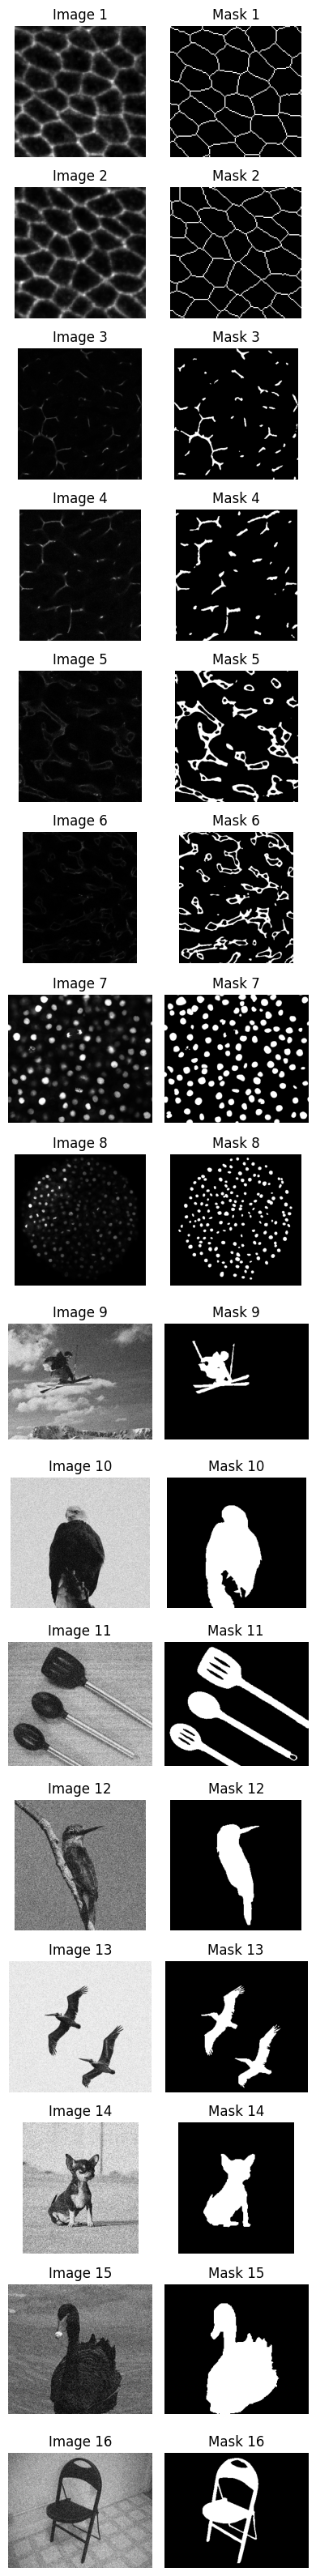

In [87]:
# Transform to gray scale
for idx, img in enumerate(images):
  if len(img.shape) > 2 and img.shape[2] == 3:
    images[idx] = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Plot
num_samples = len(images)
fig, axes = plt.subplots(num_samples, 2, figsize=(4, 2 * num_samples))

# Plot each image-mask pair
for i in range(num_samples):
    #print(f'{i}: {np.max(images[i])} - dtype {images[i].dtype} - shape {images[i].shape}')
    # Plot image in first column
    axes[i, 0].imshow(images[i], cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Image {}'.format(i+1))

    # Plot mask in second column
    axes[i, 1].imshow(masks[i], cmap='gray')
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Mask {}'.format(i+1))

plt.tight_layout()
plt.show()

In [88]:
!pip install brisque
!pip install bm3d

Processing 0
Processing 1
Processing 2
Processing 3
Processing 4
Processing 5
Processing 6
Processing 7
Processing 8
Processing 9
Processing 10
Processing 11
Processing 12
Processing 13
Processing 14
Processing 15


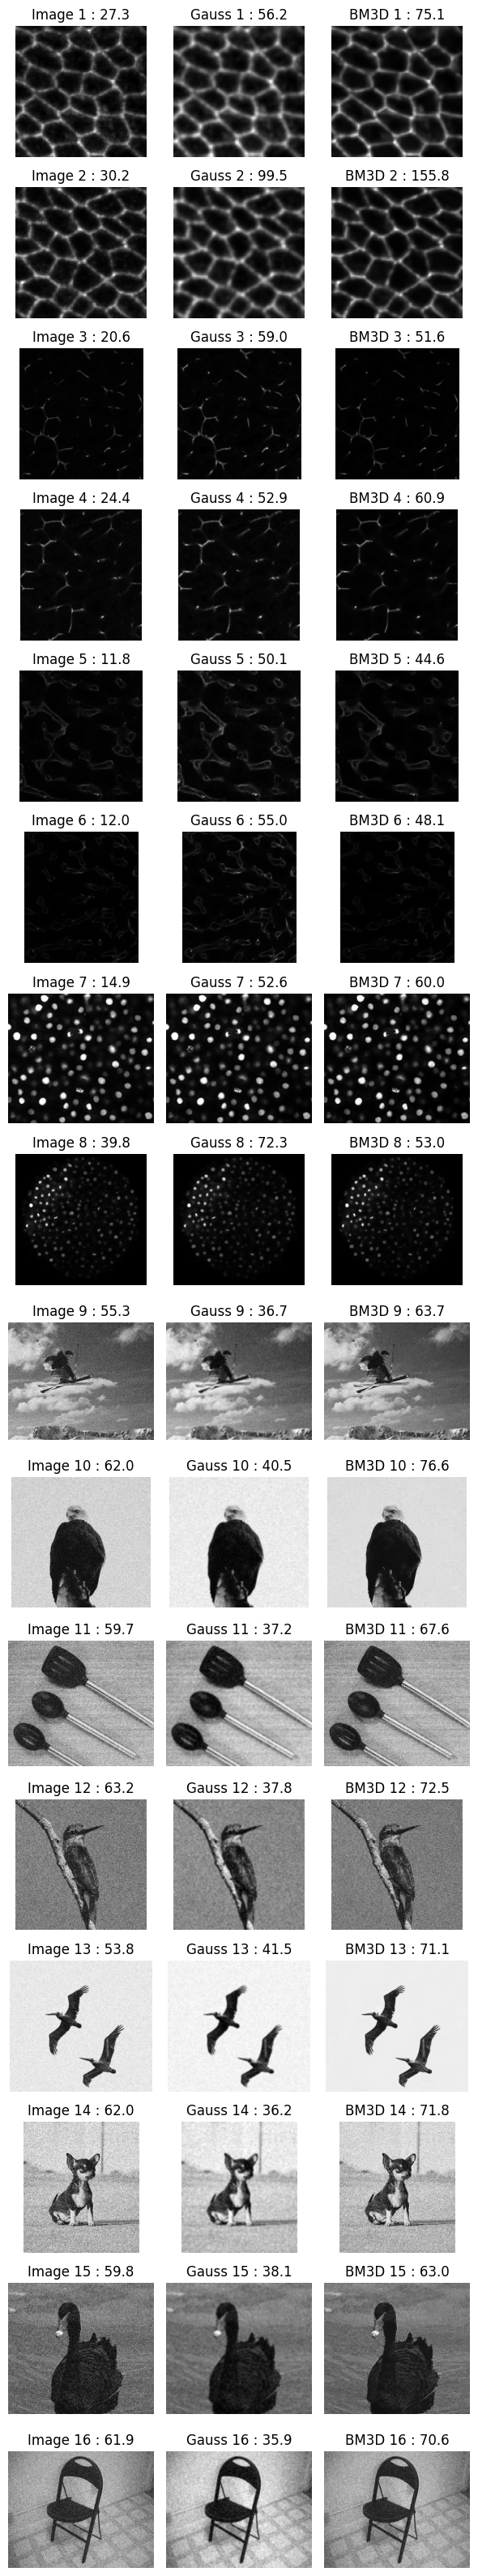

In [89]:
import bm3d
from brisque import BRISQUE

sigma = 35
sigma_gauss = 1

images_gauss = []
images_denoised = []

brisque_img, brisque_gauss, brisque_denoised = [], [], []

for idx, img in enumerate(images):
  print(f'Processing {idx}')
  img_gauss = cv2.GaussianBlur(img, (0, 0), sigma_gauss)
  img_denoised = bm3d.bm3d(img, sigma)
  images_gauss.append(img_gauss)
  images_denoised.append(img_denoised )

  img = np.stack((img,) * 3, axis=-1)
  img_gauss = np.stack((img_gauss,) * 3, axis=-1)
  img_denoised = np.stack((img_denoised,) * 3, axis=-1)

  obj = BRISQUE(url=False)
  brisque_img.append(obj.score(img=img))
  obj = BRISQUE(url=False)
  brisque_gauss.append(obj.score(img=img_gauss))
  obj = BRISQUE(url=False)
  brisque_denoised.append(obj.score(img=img_denoised))

# Plot
num_samples = len(images)
fig, axes = plt.subplots(num_samples, 3, figsize=(6, 2 * num_samples))

# Plot each image-mask pair
for i in range(num_samples):
    #print(f'{i}: {np.max(images[i])} - dtype {images[i].dtype} - shape {images[i].shape}')
    # Plot image in first column
    axes[i, 0].imshow(images[i], cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f'Image {i+1} : {brisque_img[i]:.1f}')

    # Plot mask in second column
    axes[i, 1].imshow(images_gauss[i], cmap='gray')
    axes[i, 1].axis('off')
    axes[i, 1].set_title(f'Gauss {i+1} : {brisque_gauss[i]:.1f}')

    # Plot mask in second column
    axes[i, 2].imshow(images_denoised[i], cmap='gray')
    axes[i, 2].axis('off')
    axes[i, 2].set_title(f'BM3D {i+1} : {brisque_denoised[i]:.1f}')
plt.tight_layout()
plt.show()




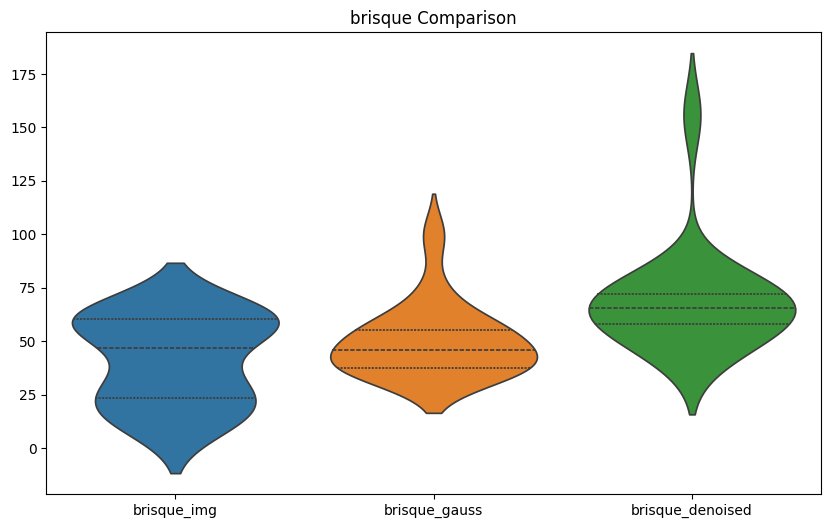

In [90]:
import pandas as pd
import seaborn as sns


# Plotting results
metrics_df = pd.DataFrame({
    'brisque_img': brisque_img,
    'brisque_gauss': brisque_gauss,
    'brisque_denoised': brisque_denoised
})

# Plot brisque
plt.figure(figsize=(10, 6))
sns.violinplot(data=metrics_df[[ 'brisque_img','brisque_gauss','brisque_denoised']], inner="quartile")
plt.title('brisque Comparison')
plt.show()

## 4. Image Segmentation
*   Sgemnetd the images after denoising using: manual thresholding, automatic threholding (i.e. Otsu) and adaptative thresholding (i.e. estimated background and substract form the image, then binarize).
*   Use widgets for the interactive selection of the manual threshold and choose the best values for 2 selected images.
*   Visualize the results using subplots. For each image, display:
    - The denoised image.
    - The corresponding mask (GT).
    - The results of the three segmentation methods.
*    Calulate the accuracy, precision, recall, f1 and dice coefficient for all images and print them over them in the plot
*    Make a comparative plots of ecah metric for all the results of the segmentation methods.
*   Conclude which one is the best method for segmentation in your dataset



Processing 0
Processing 1
Processing 2
Processing 3
Processing 4
Processing 5
Processing 6
Processing 7
Processing 8
Processing 9
Processing 10
Processing 11
Processing 12
Processing 13
Processing 14
Processing 15


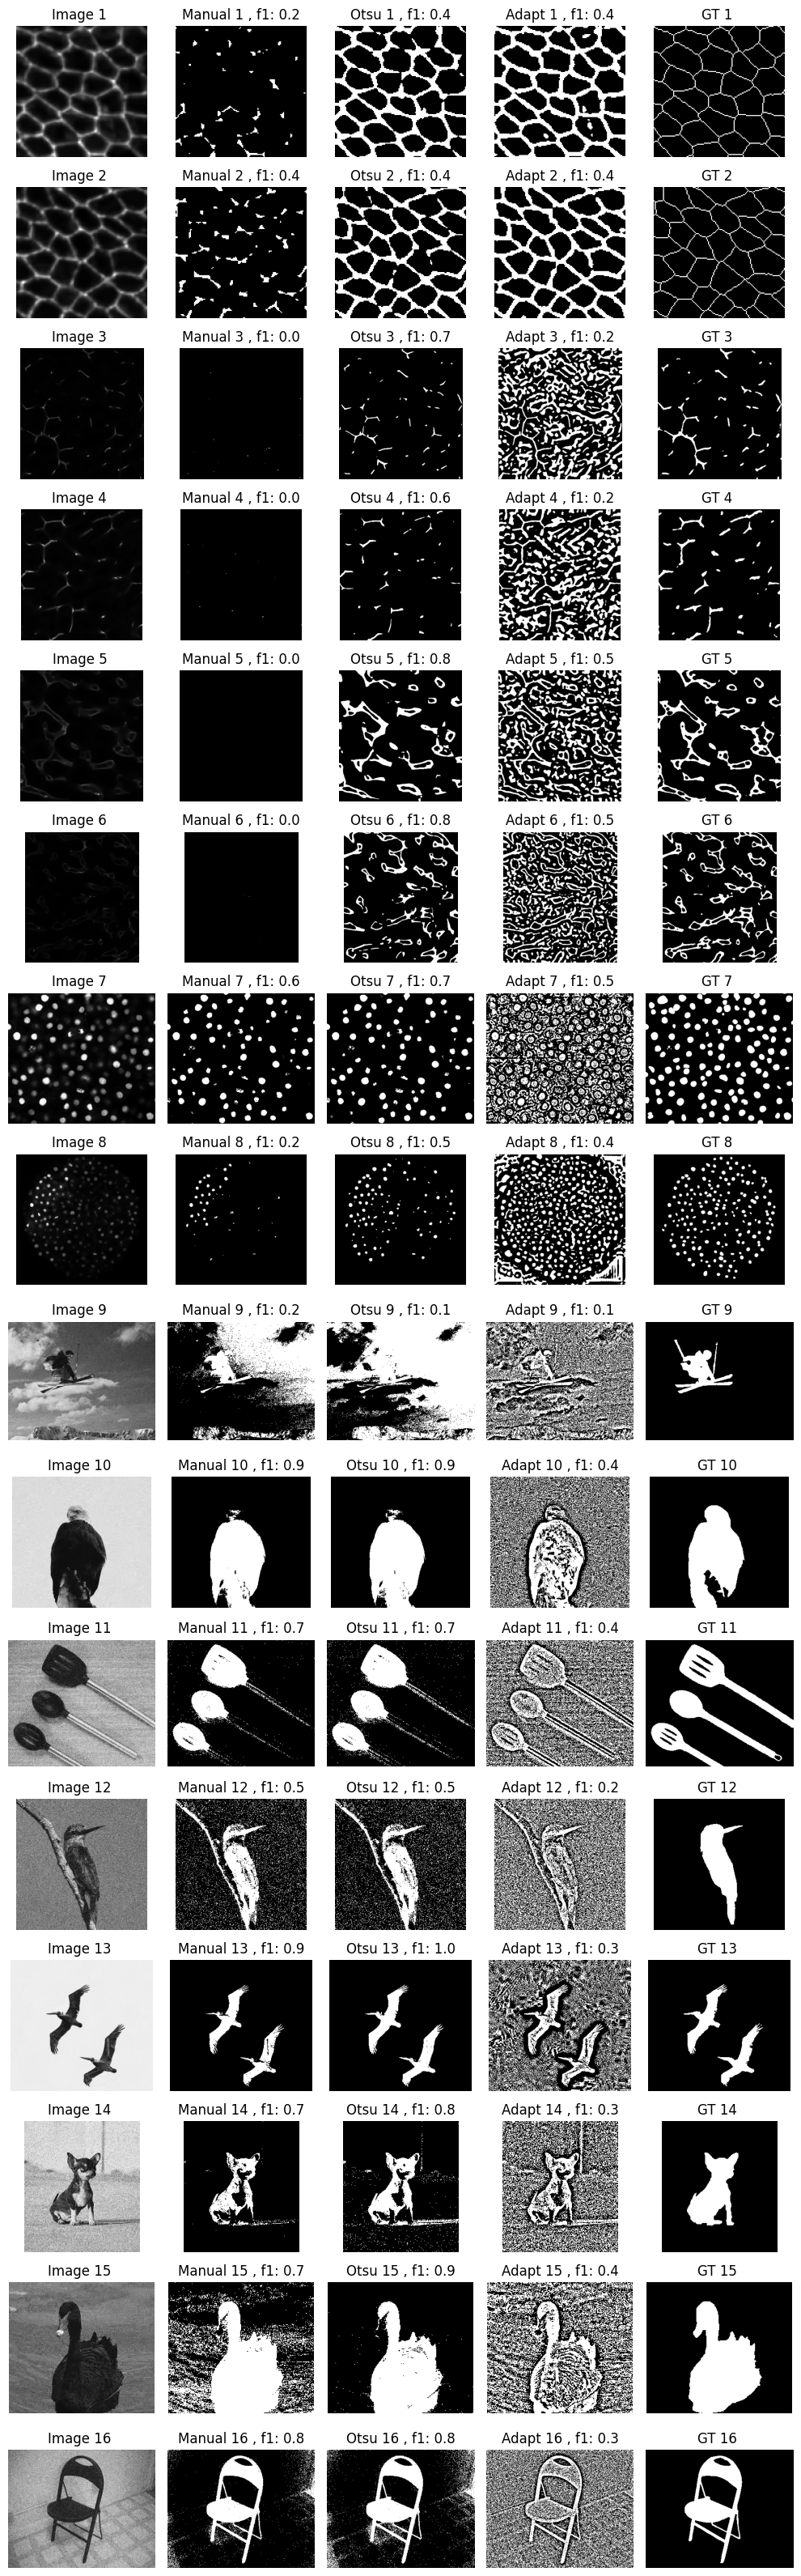

In [104]:
from sklearn.metrics import f1_score
thres_m = 100

masks_manual = []
masks_otsu   = []
masks_adpt   = []

f1_manual, f1_otsu, f1_adpt = [], [], []

for idx, img in enumerate(images_denoised):
  print(f'Processing {idx}')

  mask_manual = img > thres_m
  mask_manual = mask_manual.astype(np.int8)

  thresh = threshold_otsu(img)
  mask_otsu = img > thresh
  mask_otsu = mask_otsu.astype(np.int8)

  mask_adpt = img > threshold_local(img, block_size=25, method='gaussian')
  mask_adpt = mask_adpt.astype(np.int8)

  if idx > 7:
    mask_manual = 1 - mask_manual
    mask_otsu = 1 - mask_otsu
    mask_adpt = 1 - mask_adpt

  #print(f'mask_manual: {np.max(mask_manual)}, mask_otsu: {np.max(mask_otsu)}, mask_adpt: {np.max(mask_adpt)}')

  masks_manual.append(mask_manual)
  masks_otsu.append(mask_otsu)
  masks_adpt.append(mask_adpt)

  f1_manual.append(f1_score(masks[idx].flatten(), mask_manual.flatten()))
  f1_otsu.append(f1_score(masks[idx].flatten(), mask_otsu.flatten()))
  f1_adpt.append(f1_score(masks[idx].flatten(), mask_adpt.flatten()))



# Plot
num_samples = len(images_denoised)
fig, axes = plt.subplots(num_samples, 5, figsize=(10, 2 * num_samples))

# Plot each image-mask pair
for i in range(num_samples):
    #print(f'{i}: {np.max(images[i])} - dtype {images[i].dtype} - shape {images[i].shape}')
    # Plot image in first column
    axes[i, 0].imshow(images_denoised[i], cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f'Image {i+1} ')

    axes[i, 1].imshow(masks_manual[i], cmap='gray')
    axes[i, 1].axis('off')
    axes[i, 1].set_title(f'Manual {i+1} , f1: {f1_manual[i]:.1f}')

    axes[i, 2].imshow(masks_otsu[i], cmap='gray')
    axes[i, 2].axis('off')
    axes[i, 2].set_title(f'Otsu {i+1} , f1: {f1_otsu[i]:.1f}')

    axes[i, 3].imshow(masks_adpt[i], cmap='gray')
    axes[i, 3].axis('off')
    axes[i, 3].set_title(f'Adapt {i+1} , f1: {f1_adpt[i]:.1f}')

    axes[i, 4].imshow(masks[i], cmap='gray')
    axes[i, 4].axis('off')
    axes[i, 4].set_title(f'GT {i+1} ')


plt.tight_layout()
plt.show()


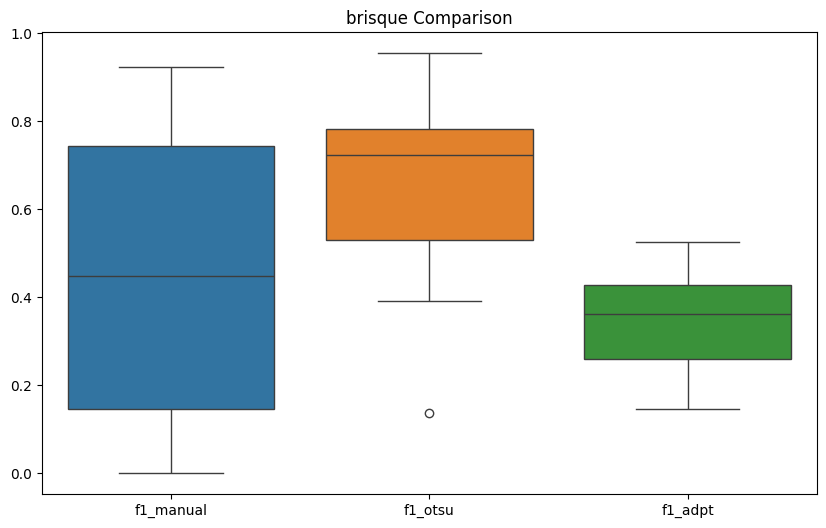

In [106]:

# Plotting results
metrics_df = pd.DataFrame({
    'f1_manual': f1_manual,
    'f1_otsu': f1_otsu,
    'f1_adpt': f1_adpt
})

# Plot brisque
plt.figure(figsize=(10, 6))
sns.boxplot(data=metrics_df[['f1_manual', 'f1_otsu', 'f1_adpt']])
plt.title('brisque Comparison')
plt.show()

## 5. Morphological operations

*   Apply differnte morphological operations, i.e. closing, opening and filling holes to the best segmention images obtained in 4.
*   Visualize the best results using subplots. For each image, display:
    - The noisy image.
    - The corresponding ground truth (GT).
    - Best segmented images (from 4).
    - Segmented images after the morphological operations.
*   Calulate the accuracy, precision, recall, f1 and dice coefficient for all image segmentations and print them over them in the plot
*    Make a comparative plots of ecah metric for all the results of the morphological operations.
*   Conclude which one is the best method for your dataset